In [1]:
#importing required analysis libraries
import numpy as np   #working with arrays
import pandas as pd   #analysis and importing data
import matplotlib.pyplot as plt  #collection of func as in matlab
import matplotlib.cm as cm    #mapping numb to colors by colormaps
import seaborn as sbn     #data visualization

In [2]:
#reading the data by importing dataset
credit_train=pd.read_csv("Job a thon train.csv")

In [3]:
#printing dataset
credit_train

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [4]:
#total rows and columns
credit_train.shape

(245725, 11)

In [5]:
#attribute analysis
credit_train.describe

<bound method NDFrame.describe of               ID  Gender  Age Region_Code     Occupation Channel_Code  \
0       NNVBBKZB  Female   73       RG268          Other           X3   
1       IDD62UNG  Female   30       RG277       Salaried           X1   
2       HD3DSEMC  Female   56       RG268  Self_Employed           X3   
3       BF3NC7KV    Male   34       RG270       Salaried           X1   
4       TEASRWXV  Female   30       RG282       Salaried           X1   
...          ...     ...  ...         ...            ...          ...   
245720  BPAWWXZN    Male   51       RG284  Self_Employed           X3   
245721  HFNB7JY8    Male   27       RG268       Salaried           X1   
245722  GEHAUCWT  Female   26       RG281       Salaried           X1   
245723  GE7V8SAH  Female   28       RG273       Salaried           X1   
245724  BOCZSWLJ    Male   29       RG269       Salaried           X1   

        Vintage Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
0            43 

In [6]:
#checking for null or missing values
df=pd.DataFrame(credit_train)
df.isnull().head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,True,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#mapping the varibles 
#label encoding for making it easier to interpret by the machine 
from sklearn.preprocessing import LabelEncoder
credit_train["Gender"]=LabelEncoder().fit_transform(credit_train["Gender"])
credit_train["Age"]=LabelEncoder().fit_transform(credit_train["Age"])
credit_train["Region_Code"]=LabelEncoder().fit_transform(credit_train["Region_Code"])
credit_train["Occupation"]=LabelEncoder().fit_transform(credit_train["Occupation"])
credit_train["Channel_Code"]=LabelEncoder().fit_transform(credit_train["Channel_Code"])
credit_train["Vintage"]=LabelEncoder().fit_transform(credit_train["Vintage"])

credit_train["Avg_Account_Balance"]=LabelEncoder().fit_transform(credit_train["Avg_Account_Balance"])

credit_train.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,50,18,1,2,18,No,69898,No,0
1,IDD62UNG,0,7,27,2,0,13,No,28951,No,0
2,HD3DSEMC,0,33,18,3,2,10,No,96873,Yes,0
3,BF3NC7KV,1,11,20,2,0,6,No,18490,No,0
4,TEASRWXV,0,7,32,2,0,14,No,57050,No,0
5,ACUTYTWS,1,33,11,3,0,13,No,25336,Yes,0
6,ETQCZFEJ,1,39,32,1,2,7,NaN,70746,Yes,1
7,JJNJUQMQ,0,25,15,3,2,3,No,16161,Yes,0
8,ZMQFYKCB,0,17,33,3,1,16,No,85550,No,0
9,NVKTFBA2,0,32,18,3,1,21,Yes,115077,No,0


In [8]:
#ensuring the column to be in numeric form by napping binary digits
credit_train["Credit_Product"]=credit_train.Credit_Product.map(dict(Yes=1, No=0))
credit_train.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,50,18,1,2,18,0.0,69898,No,0
1,IDD62UNG,0,7,27,2,0,13,0.0,28951,No,0
2,HD3DSEMC,0,33,18,3,2,10,0.0,96873,Yes,0
3,BF3NC7KV,1,11,20,2,0,6,0.0,18490,No,0
4,TEASRWXV,0,7,32,2,0,14,0.0,57050,No,0
5,ACUTYTWS,1,33,11,3,0,13,0.0,25336,Yes,0
6,ETQCZFEJ,1,39,32,1,2,7,NaN,70746,Yes,1
7,JJNJUQMQ,0,25,15,3,2,3,0.0,16161,Yes,0
8,ZMQFYKCB,0,17,33,3,1,16,0.0,85550,No,0
9,NVKTFBA2,0,32,18,3,1,21,1.0,115077,No,0


In [9]:
#filling the null values of credit product column from the cell above it
df1=pd.DataFrame(credit_train)
df1['Credit_Product'].fillna(method='ffill', inplace=True) #filling on the basis of values in above row
credit_train["Credit_Product"]=df1["Credit_Product"]
credit_train.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,50,18,1,2,18,0.0,69898,No,0
1,IDD62UNG,0,7,27,2,0,13,0.0,28951,No,0
2,HD3DSEMC,0,33,18,3,2,10,0.0,96873,Yes,0
3,BF3NC7KV,1,11,20,2,0,6,0.0,18490,No,0
4,TEASRWXV,0,7,32,2,0,14,0.0,57050,No,0
5,ACUTYTWS,1,33,11,3,0,13,0.0,25336,Yes,0
6,ETQCZFEJ,1,39,32,1,2,7,0.0,70746,Yes,1
7,JJNJUQMQ,0,25,15,3,2,3,0.0,16161,Yes,0
8,ZMQFYKCB,0,17,33,3,1,16,0.0,85550,No,0
9,NVKTFBA2,0,32,18,3,1,21,1.0,115077,No,0


In [10]:
#changing datatype of Credit_Product from float to int
df=pd.DataFrame(credit_train)
df['Credit_Product'] = df['Credit_Product'].astype(int) #float to integer conversion
credit_train["Credit_Product"]=df["Credit_Product"]
credit_train.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,50,18,1,2,18,0,69898,No,0
1,IDD62UNG,0,7,27,2,0,13,0,28951,No,0
2,HD3DSEMC,0,33,18,3,2,10,0,96873,Yes,0
3,BF3NC7KV,1,11,20,2,0,6,0,18490,No,0
4,TEASRWXV,0,7,32,2,0,14,0,57050,No,0
5,ACUTYTWS,1,33,11,3,0,13,0,25336,Yes,0
6,ETQCZFEJ,1,39,32,1,2,7,0,70746,Yes,1
7,JJNJUQMQ,0,25,15,3,2,3,0,16161,Yes,0
8,ZMQFYKCB,0,17,33,3,1,16,0,85550,No,0
9,NVKTFBA2,0,32,18,3,1,21,1,115077,No,0


In [11]:
credit_train["Is_Active"]=credit_train.Is_Active.map(dict(Yes=1, No=0)) #ensuring the column to be numeric form by mapping

In [12]:
credit_train.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,50,18,1,2,18,0,69898,0,0
1,IDD62UNG,0,7,27,2,0,13,0,28951,0,0
2,HD3DSEMC,0,33,18,3,2,10,0,96873,1,0
3,BF3NC7KV,1,11,20,2,0,6,0,18490,0,0
4,TEASRWXV,0,7,32,2,0,14,0,57050,0,0


In [13]:
credit_train.head(20)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,50,18,1,2,18,0,69898,0,0
1,IDD62UNG,0,7,27,2,0,13,0,28951,0,0
2,HD3DSEMC,0,33,18,3,2,10,0,96873,1,0
3,BF3NC7KV,1,11,20,2,0,6,0,18490,0,0
4,TEASRWXV,0,7,32,2,0,14,0,57050,0,0
5,ACUTYTWS,1,33,11,3,0,13,0,25336,1,0
6,ETQCZFEJ,1,39,32,1,2,7,0,70746,1,1
7,JJNJUQMQ,0,25,15,3,2,3,0,16161,1,0
8,ZMQFYKCB,0,17,33,3,1,16,0,85550,0,0
9,NVKTFBA2,0,32,18,3,1,21,1,115077,0,0


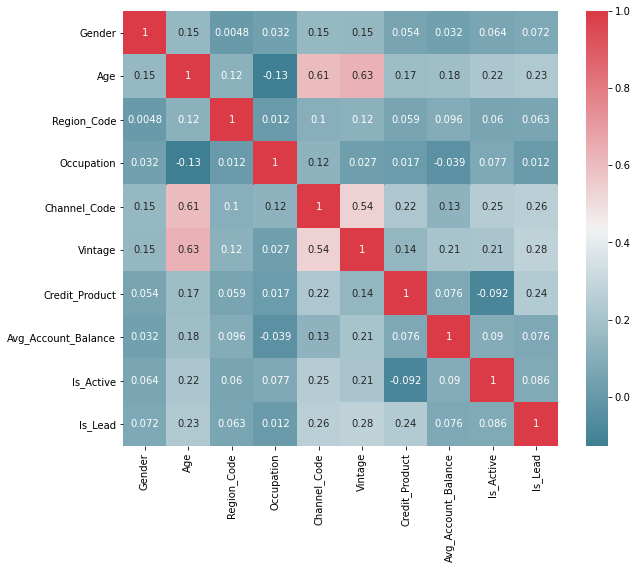

In [14]:
#plotting heatmap after data cleaning to verify
f,ax=plt.subplots(figsize=(10,8))#matplotlib figure and its size
corr=credit_train.corr() #correlation matrix
sbn.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sbn.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot=True)
plt.show()

In [15]:
# Splitting Data
Ydata = pd.DataFrame(data = credit_train.iloc[:, 1].values, columns = ['Is_Lead']) #the target value
Ydata

,Is_Lead
0,0
1,0
2,0
3,1
4,0
...,...
245720,1
245721,1
245722,0
245723,0


In [16]:
Xdata=credit_train.drop(['Is_Lead','ID'],axis=1)
#dropping the unrequired data from the training dataset
Xdata.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,50,18,1,2,18,0,69898,0
1,0,7,27,2,0,13,0,28951,0
2,0,33,18,3,2,10,0,96873,1
3,1,11,20,2,0,6,0,18490,0
4,0,7,32,2,0,14,0,57050,0


In [17]:
#splitting of datasets into testing and training sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(Xdata, Ydata, test_size=0.2, random_state=42)
X_train.shape

(196580, 9)

In [18]:
# train models
from sklearn.ensemble import RandomForestClassifier

# using random forest classifier
model1 = RandomForestClassifier()

# fit model
model1.fit(X_train, Y_train.values.ravel())

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)


In [19]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
print(auc_score1)

1.0


## TESTING

In [20]:
#now making predictions to the new data
credit_test=pd.read_csv("JobAThon_Test.csv")
credit_test

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes


In [21]:
#total rows and columns
credit_test.shape

(105312, 10)

In [22]:
#attribute analysis
credit_test.describe

<bound method NDFrame.describe of               ID  Gender  Age Region_Code Occupation Channel_Code  Vintage  \
0       VBENBARO    Male   29       RG254      Other           X1       25   
1       CCMEWNKY    Male   43       RG268      Other           X2       49   
2       VK3KGA9M    Male   31       RG270   Salaried           X1       14   
3       TT8RPZVC    Male   29       RG272      Other           X1       33   
4       SHQZEYTZ  Female   29       RG270      Other           X1       19   
...          ...     ...  ...         ...        ...          ...      ...   
105307  DBENJOYI    Male   52       RG268   Salaried           X2       86   
105308  CWQ72DWS    Male   55       RG277      Other           X2       86   
105309  HDESC8GU    Male   35       RG254   Salaried           X4       15   
105310  2PW4SFCA    Male   53       RG254      Other           X3       93   
105311  F2NOYPPZ    Male   27       RG256   Salaried           X1       21   

       Credit_Product  Avg_Ac

In [23]:
#checking for null or missing values
df=pd.DataFrame(credit_test)
df.isnull().head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,True,False,False
9,False,False,False,False,False,False,False,False,False,False


In [24]:
#mapping the varibles 
#label encoding for making it easier to interpret by the machine 
from sklearn.preprocessing import LabelEncoder
credit_test["Gender"]=LabelEncoder().fit_transform(credit_test["Gender"])
credit_test["Age"]=LabelEncoder().fit_transform(credit_test["Age"])
credit_test["Region_Code"]=LabelEncoder().fit_transform(credit_test["Region_Code"])
credit_test["Occupation"]=LabelEncoder().fit_transform(credit_test["Occupation"])
credit_test["Channel_Code"]=LabelEncoder().fit_transform(credit_test["Channel_Code"])
credit_test["Vintage"]=LabelEncoder().fit_transform(credit_test["Vintage"])

credit_test["Avg_Account_Balance"]=LabelEncoder().fit_transform(credit_test["Avg_Account_Balance"])

credit_test.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,1,5,4,1,0,9,Yes,27635,No
1,CCMEWNKY,1,19,18,1,1,21,NaN,37999,No
2,VK3KGA9M,1,7,20,2,0,4,No,732,No
3,TT8RPZVC,1,5,22,1,0,14,No,34903,No
4,SHQZEYTZ,0,5,20,1,0,6,No,22312,No
5,MZZAQMPT,1,36,18,3,2,52,No,77336,No
6,Y88TW36I,0,45,3,1,1,30,No,43336,No
7,3UGOAQNU,0,6,7,2,0,14,No,33249,No
8,VVUKMUJT,1,19,34,2,2,38,NaN,41856,Yes
9,9R363ZXS,0,30,33,3,1,15,Yes,63256,No


In [25]:
#mapping categorical vvalues in numerics
credit_test["Credit_Product"]=credit_test.Credit_Product.map(dict(Yes=1, No=0))
credit_test.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,1,5,4,1,0,9,1.0,27635,No
1,CCMEWNKY,1,19,18,1,1,21,NaN,37999,No
2,VK3KGA9M,1,7,20,2,0,4,0.0,732,No
3,TT8RPZVC,1,5,22,1,0,14,0.0,34903,No
4,SHQZEYTZ,0,5,20,1,0,6,0.0,22312,No
5,MZZAQMPT,1,36,18,3,2,52,0.0,77336,No
6,Y88TW36I,0,45,3,1,1,30,0.0,43336,No
7,3UGOAQNU,0,6,7,2,0,14,0.0,33249,No
8,VVUKMUJT,1,19,34,2,2,38,NaN,41856,Yes
9,9R363ZXS,0,30,33,3,1,15,1.0,63256,No


In [26]:
#filling the null values of credit product column from the cell above it
df2=pd.DataFrame(credit_test)
df2['Credit_Product'].fillna(method='ffill', inplace=True) #filling NaN values with the cell valuesfrom above row
credit_test["Credit_Product"]=df2["Credit_Product"]
credit_test.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,1,5,4,1,0,9,1.0,27635,No
1,CCMEWNKY,1,19,18,1,1,21,1.0,37999,No
2,VK3KGA9M,1,7,20,2,0,4,0.0,732,No
3,TT8RPZVC,1,5,22,1,0,14,0.0,34903,No
4,SHQZEYTZ,0,5,20,1,0,6,0.0,22312,No
5,MZZAQMPT,1,36,18,3,2,52,0.0,77336,No
6,Y88TW36I,0,45,3,1,1,30,0.0,43336,No
7,3UGOAQNU,0,6,7,2,0,14,0.0,33249,No
8,VVUKMUJT,1,19,34,2,2,38,0.0,41856,Yes
9,9R363ZXS,0,30,33,3,1,15,1.0,63256,No


In [27]:
#changing datatype of Credit_Product from foat to int
df3=pd.DataFrame(credit_test)
df3['Credit_Product'] = df3['Credit_Product'].astype(int)
credit_test["Credit_Product"]=df3["Credit_Product"]
credit_test.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,1,5,4,1,0,9,1,27635,No
1,CCMEWNKY,1,19,18,1,1,21,1,37999,No
2,VK3KGA9M,1,7,20,2,0,4,0,732,No
3,TT8RPZVC,1,5,22,1,0,14,0,34903,No
4,SHQZEYTZ,0,5,20,1,0,6,0,22312,No
5,MZZAQMPT,1,36,18,3,2,52,0,77336,No
6,Y88TW36I,0,45,3,1,1,30,0,43336,No
7,3UGOAQNU,0,6,7,2,0,14,0,33249,No
8,VVUKMUJT,1,19,34,2,2,38,0,41856,Yes
9,9R363ZXS,0,30,33,3,1,15,1,63256,No


In [28]:
credit_test["Is_Active"]=credit_test.Is_Active.map(dict(Yes=1, No=0)) #categorical into numerical

In [29]:
credit_test.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,1,5,4,1,0,9,1,27635,0
1,CCMEWNKY,1,19,18,1,1,21,1,37999,0
2,VK3KGA9M,1,7,20,2,0,4,0,732,0
3,TT8RPZVC,1,5,22,1,0,14,0,34903,0
4,SHQZEYTZ,0,5,20,1,0,6,0,22312,0
5,MZZAQMPT,1,36,18,3,2,52,0,77336,0
6,Y88TW36I,0,45,3,1,1,30,0,43336,0
7,3UGOAQNU,0,6,7,2,0,14,0,33249,0
8,VVUKMUJT,1,19,34,2,2,38,0,41856,1
9,9R363ZXS,0,30,33,3,1,15,1,63256,0


In [30]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = credit_test.drop("ID",axis=1)
X_test=scaler.fit_transform(X_test)

In [31]:
prediction = model1.predict(X_test)

In [32]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       105312 non-null  int32
dtypes: int32(1)
memory usage: 411.5 KB


In [33]:
prediction = prediction.rename(columns={0: "Is_Lead"})
prediction.head()

,Is_Lead
0,1
1,1
2,1
3,1
4,0


In [34]:
prediction.to_csv('Predictions.csv',index=False,header=True)

In [35]:
df_new2=pd.read_csv("Predictions.csv")

In [41]:
df_isl=pd.DataFrame()
df_isl["ID"]=""
df_isl["Is_Lead"]=""

In [42]:
df_new=pd.read_csv("JobAThon_Test.csv")
df_isl["ID"]=df_new["ID"]

In [43]:
df_isl["Is_Lead"]=df_new2["Is_Lead"]
df_isl.to_csv("Predictions_final.csv",index=False,header=True)